In [131]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 8) # adjust the configuration of the plots

# set number of display rows:
# pd.set_option('display.max_rows', None) # display all rows of dataframe

In [96]:
df = pd.read_csv("movies.csv")
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [97]:
df.duplicated().sum()

0

In [98]:
def checkColNull(df):
  for col in df.columns:
    pct_missing = np.mean(df[col].isnull()) * 100
    if pct_missing == 0:
        print('{} - NO NULL'.format(col))
    else:
        print('{} - {:.2f}%'.format(col, pct_missing))

In [99]:
checkColNull(df)

name - NO NULL
rating - 1.00%
genre - NO NULL
year - NO NULL
released - 0.03%
score - 0.04%
votes - 0.04%
director - NO NULL
writer - 0.04%
star - 0.01%
country - 0.04%
budget - 28.31%
gross - 2.46%
company - 0.22%
runtime - 0.05%


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 629.1+ KB


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 629.1+ KB


In [102]:
df.budget = df.budget.fillna(0)
df.gross = df.gross.fillna(0)

In [103]:
checkColNull(df)

name - NO NULL
rating - 1.00%
genre - NO NULL
year - NO NULL
released - 0.03%
score - 0.04%
votes - 0.04%
director - NO NULL
writer - 0.04%
star - 0.01%
country - 0.04%
budget - NO NULL
gross - NO NULL
company - 0.22%
runtime - 0.05%


In [104]:
df['budget'] = df['budget'].astype('int64')
df.gross = df.gross.astype('int64')


In [105]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [106]:
df.rating.value_counts()

R            3697
PG-13        2112
PG           1252
Not Rated     283
G             153
Unrated        52
NC-17          23
TV-MA           9
TV-PG           5
X               3
Approved        1
TV-14           1
Name: rating, dtype: int64

In [107]:
df_g_pg = df[df.rating.isin(['PG', 'G'])]
df_anime = df[df.genre == 'Animation']

In [108]:
df_anime_sort = df_anime.sort_values(by=['score'], inplace=False, ascending=False)
df_anime_sort.head(20)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
3849,Spirited Away,PG,Animation,2001,"March 28, 2003 (United States)",8.6,679000.0,Hayao Miyazaki,Hayao Miyazaki,Daveigh Chase,Japan,19000000,355475245,Tokuma Shoten,125.0
2448,The Lion King,G,Animation,1994,"June 24, 1994 (United States)",8.5,970000.0,Roger Allers,Irene Mecchi,Matthew Broderick,United States,45000000,1083720877,Walt Disney Pictures,88.0
7252,Spider-Man: Into the Spider-Verse,PG,Animation,2018,"December 14, 2018 (United States)",8.4,411000.0,Bob Persichetti,Phil Lord,Shameik Moore,United States,90000000,375540831,Sony Pictures Entertainment (SPE),117.0
7058,Coco,PG,Animation,2017,"November 22, 2017 (United States)",8.4,417000.0,Lee Unkrich,Lee Unkrich,Anthony Gonzalez,United States,175000000,807817888,Walt Disney Pictures,105.0
6871,Your Name.,TV-PG,Animation,2016,"April 7, 2017 (United States)",8.4,215000.0,Makoto Shinkai,Makoto Shinkai,Ryûnosuke Kamiki,Japan,0,358180115,Amuse,106.0
5260,WALL·E,G,Animation,2008,"June 27, 2008 (United States)",8.4,1000000.0,Andrew Stanton,Andrew Stanton,Ben Burtt,United States,180000000,521311890,FortyFour Studios,98.0
3065,Princess Mononoke,PG-13,Animation,1997,"December 19, 1997 (United States)",8.4,357000.0,Hayao Miyazaki,Hayao Miyazaki,Yôji Matsuda,Japan,0,169785704,DENTSU Music And Entertainment,134.0
2654,Toy Story,G,Animation,1995,"November 22, 1995 (United States)",8.3,913000.0,John Lasseter,John Lasseter,Tom Hanks,United States,30000000,394436586,Walt Disney Pictures,81.0
4462,Howl's Moving Castle,PG,Animation,2004,"June 17, 2005 (United States)",8.2,350000.0,Hayao Miyazaki,Hayao Miyazaki,Chieko Baishô,Japan,24000000,236214446,Buena Vista Home Entertainment,119.0
1264,My Neighbor Totoro,G,Animation,1988,"July 13, 1990 (United States)",8.2,304000.0,Hayao Miyazaki,Hayao Miyazaki,Hitoshi Takagi,Japan,3700000,30550920,Tokuma Japan Communications,86.0


In [147]:
df_g_pg_sort = df_g_pg.sort_values(by=['score'], inplace=False, ascending=False)
df_g_pg_sort.head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3849,Spirited Away,PG,Animation,2001,"March 28, 2003 (United States)",8.6,679000.0,Hayao Miyazaki,Hayao Miyazaki,Daveigh Chase,Japan,19000000,355475245,Tokuma Shoten,125.0
1257,Cinema Paradiso,PG,Drama,1988,"February 23, 1990 (United States)",8.5,239000.0,Giuseppe Tornatore,Giuseppe Tornatore,Philippe Noiret,Italy,5000000,13019063,Cristaldifilm,155.0
645,Back to the Future,PG,Adventure,1985,"July 3, 1985 (United States)",8.5,1100000.0,Robert Zemeckis,Robert Zemeckis,Michael J. Fox,United States,19000000,381906762,Universal Pictures,116.0
2448,The Lion King,G,Animation,1994,"June 24, 1994 (United States)",8.5,970000.0,Roger Allers,Irene Mecchi,Matthew Broderick,United States,45000000,1083720877,Walt Disney Pictures,88.0
5260,WALL·E,G,Animation,2008,"June 27, 2008 (United States)",8.4,1000000.0,Andrew Stanton,Andrew Stanton,Ben Burtt,United States,180000000,521311890,FortyFour Studios,98.0
5134,Like Stars on Earth,PG,Drama,2007,"December 21, 2007 (India)",8.4,177000.0,Aamir Khan,Amole Gupte,Darsheel Safary,India,0,21897373,Aamir Khan Productions,165.0
92,Indiana Jones and the Raiders of the Lost Ark,PG,Action,1981,"June 12, 1981 (United States)",8.4,905000.0,Steven Spielberg,Lawrence Kasdan,Harrison Ford,United States,18000000,389925971,Paramount Pictures,115.0
7058,Coco,PG,Animation,2017,"November 22, 2017 (United States)",8.4,417000.0,Lee Unkrich,Lee Unkrich,Anthony Gonzalez,United States,175000000,807817888,Walt Disney Pictures,105.0
7252,Spider-Man: Into the Spider-Verse,PG,Animation,2018,"December 14, 2018 (United States)",8.4,411000.0,Bob Persichetti,Phil Lord,Shameik Moore,United States,90000000,375540831,Sony Pictures Entertainment (SPE),117.0


In [110]:
df_by_gross = df.sort_values(by=['gross'], inplace=False, ascending=False)
df_by_gross.head(10)
# df_by_gross

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0
7480,The Lion King,PG,Animation,2019,"July 19, 2019 (United States)",6.9,222000.0,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1670727580,Walt Disney Pictures,118.0
6653,Jurassic World,PG-13,Action,2015,"June 12, 2015 (United States)",7.0,593000.0,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000,1670516444,Universal Pictures,124.0
6043,The Avengers,PG-13,Action,2012,"May 4, 2012 (United States)",8.0,1300000.0,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000,1518815515,Marvel Studios,143.0
6646,Furious 7,PG-13,Action,2015,"April 3, 2015 (United States)",7.1,370000.0,James Wan,Chris Morgan,Vin Diesel,United States,190000000,1515341399,Universal Pictures,137.0
7494,Frozen II,PG,Animation,2019,"November 22, 2019 (United States)",6.8,148000.0,Chris Buck,Jennifer Lee,Kristen Bell,United States,150000000,1450026933,Walt Disney Animation Studios,103.0


In [111]:
df.company

0                    Warner Bros.
1               Columbia Pictures
2                       Lucasfilm
3              Paramount Pictures
4                  Orion Pictures
                  ...            
7663                          NaN
7664    Cactus Blue Entertainment
7665             Embi Productions
7666                          NaN
7667                  PK 65 Films
Name: company, Length: 7668, dtype: object

In [ ]:
ddf = df.dropna(subset=['company'])


In [132]:
ddf.company.isin(["Disney"]).sum()

0

In [136]:
ddf[ddf.company.map(lambda x: "Disney" in x)].company.value_counts()

Walt Disney Pictures             123
Walt Disney Animation Studios     17
Walt Disney Productions            9
Disney Television Animation        5
Disneytoon Studios                 1
Name: company, dtype: int64

In [138]:
ddf.isin(['Comedy']).sum()

name           0
rating         0
genre       2243
year           0
released       0
score          0
votes          0
director       0
writer         0
star           0
country        0
budget         0
gross          0
company        0
runtime        0
dtype: int64

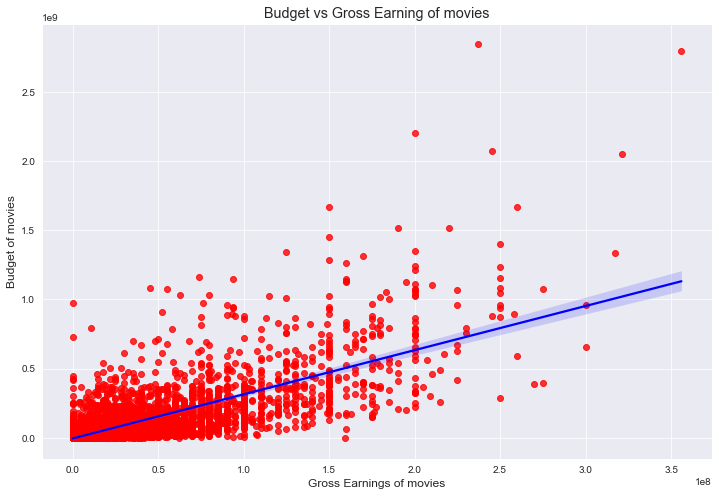

In [154]:
sns.set_style("darkgrid")
sns.regplot(x=df.budget, y=df.gross, scatter_kws={"color":"red"}, line_kws={"color":"blue"})
plt.title("Budget vs Gross Earning of movies")
plt.ylabel("Budget of movies")
plt.xlabel("Gross Earnings of movies")
plt.show()

In [160]:
df_corr = df.corr() # method = pearson (default), kendall, spearman
df_corr

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.309212,0.261900,0.120811
score,0.097995,1.000000,0.409182,0.055665,0.186392,0.399451
votes,0.222945,0.409182,1.000000,0.486862,0.632834,0.309212
budget,0.309212,0.055665,0.486862,1.000000,0.750157,0.269510
gross,0.261900,0.186392,0.632834,0.750157,1.000000,0.245235
runtime,0.120811,0.399451,0.309212,0.269510,0.245235,1.000000


Text(0.5, 52.0, 'Movie features')

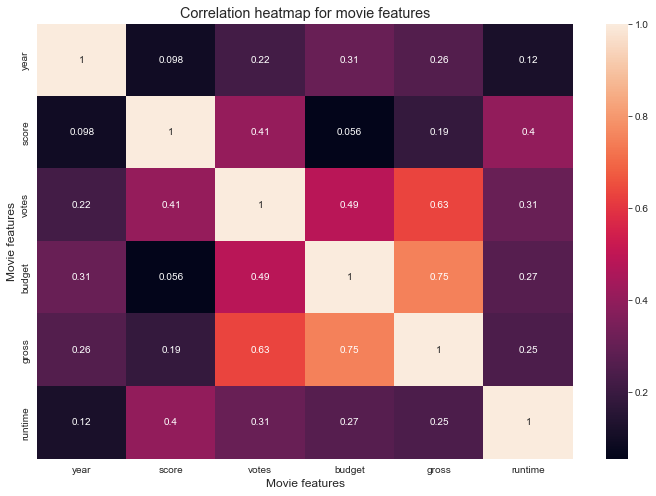

In [163]:
sns.heatmap(data=df_corr, annot=True)
plt.title("Correlation heatmap for movie features")
plt.ylabel("Movie features")
plt.xlabel("Movie features")

In [164]:
# work on "company"
# df_company_num = df.copy()